# Chapter 3 A Tour of Machine Learning Classifiers Using Scikit-learn

## 1. Perceptron

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Init and train the Perceptron algorithm here

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

### Predict the result based on the training result here

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.01):
    plt.figure(figsize=(16, 9))
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)
        
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', alpha = 1, linewidth = 1, marker = 'o', s = 80, label = 'test set', edgecolors = '0')

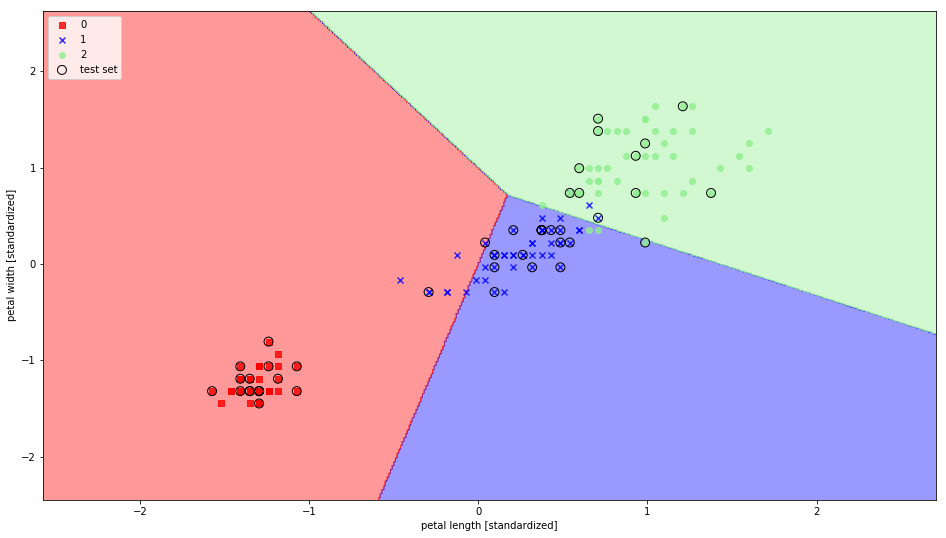

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

## 2. Logistic Regression

### Init and train the Logistic Regression algorithm here

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state = 0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

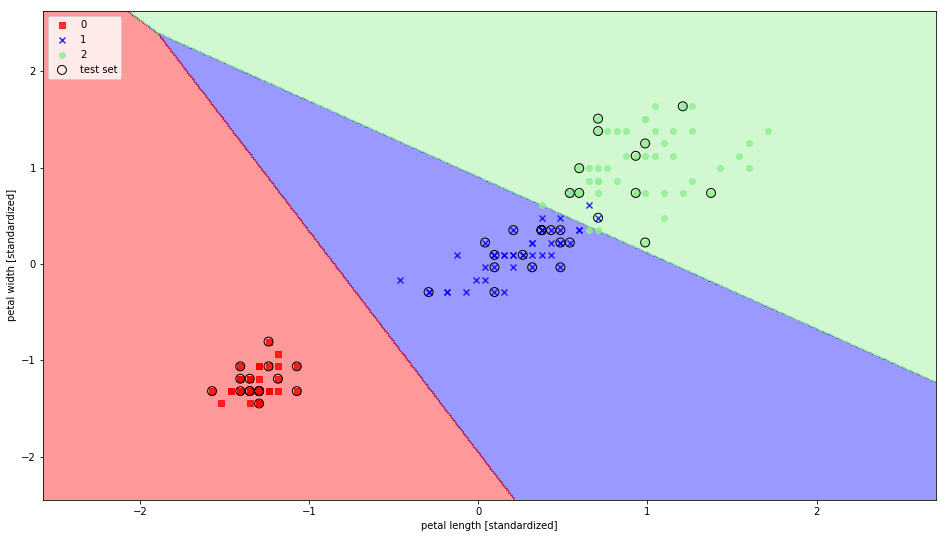

In [11]:
plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

### Plot the predicted possibilities of the 45 samples of each classes

In [12]:
X_test_std=X_test_std.reshape(-1,2)
lr.predict_proba(X_test_std)

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01],
       [  6.08753106e-04,   9.99285569e-01,   1.05678028e-04],
       [  8.16962653e-01,   1.83037347e-01,   6.48299403e-14],
       [  1.60866539e-11,   4.14084479e-01,   5.85915521e-01],
       [  8.00231776e-01,   1.99768224e-01,   1.07576258e-13],
       [  2.03283749e-13,   1.38353563e-01,   8.61646437e-01],
       [  8.64726967e-01,   1.35273033e-01,   9.27705289e-14],
       [  4.92680691e-07,   7.61844645e-01,   2.38154862e-01],
       [  6.63326495e-07,   8.43292211e-01,   1.56707126e-01],
       [  8.06447009e-05,   9.97737477e-01,   2.18187798e-03],
       [  9.03984802e-09,   4.62107297e-01,   5.37892694e-01],
       [  1.54213753e-06,   8.75626483e-01,   1.24371975e-01],
       [  5.21240195e-06,   9.81860065e-01,   1.81347231e-02],
       [  8.78337572e-07,   8.24894420e-01,   1.75104701e-01],
       [  1.13609831e-06,   8.90634747e-01,   1.09364117e-01],
       [  7.63277074e-01,   2.36722926e-01,   4.4802826

## 3. Support Vector Machine (including Slack Variables)

### Init and train the SVM algorithm here

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

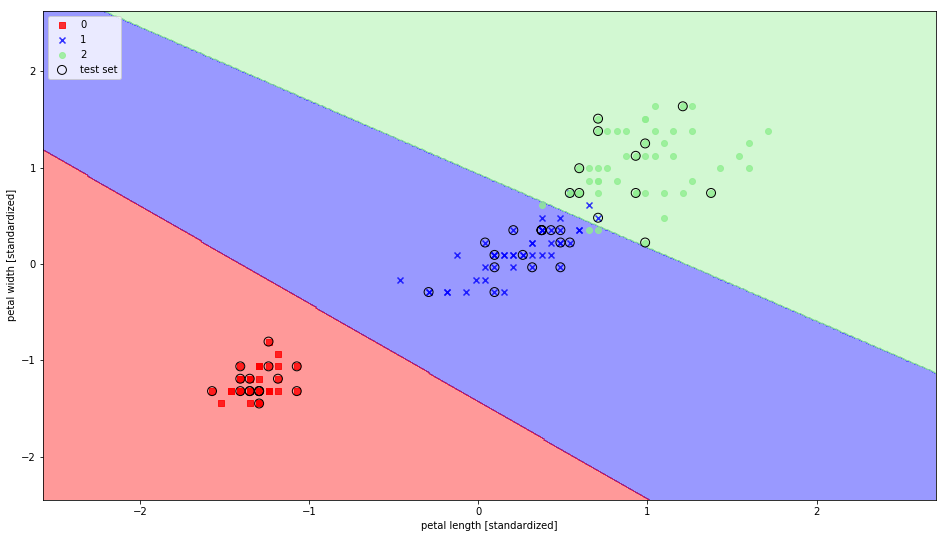

In [14]:
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 4. Solving Nonlinear Problems using a Kernel SVM

### Generate XOR Dataset with Random Noise

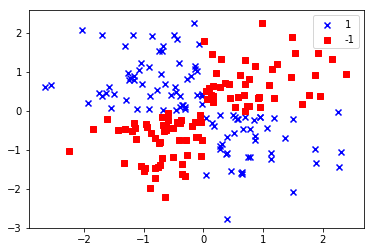

In [15]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s',label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()


### The Kernel SVM algorithm

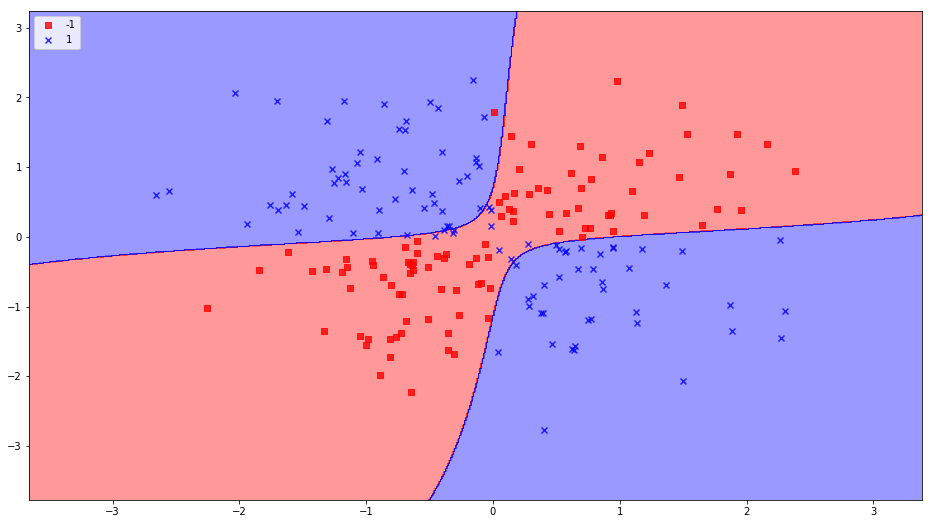

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

## 5. Classification Decision Tree

### Visualizing Different Impurity Functions

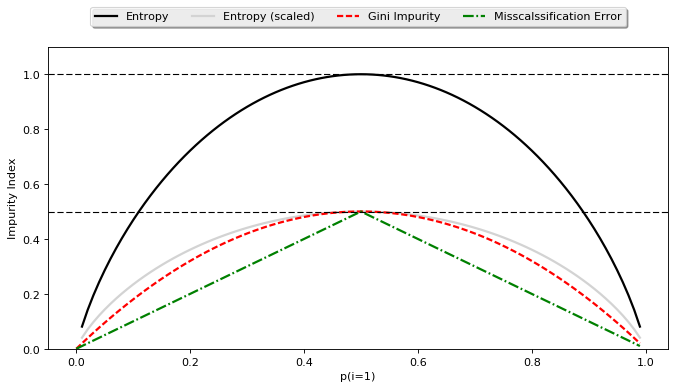

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
    return 1-np.max([p,(1-p)])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure(figsize=(10,5), dpi=80)
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misscalssification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line=ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### Building A Decision Tree

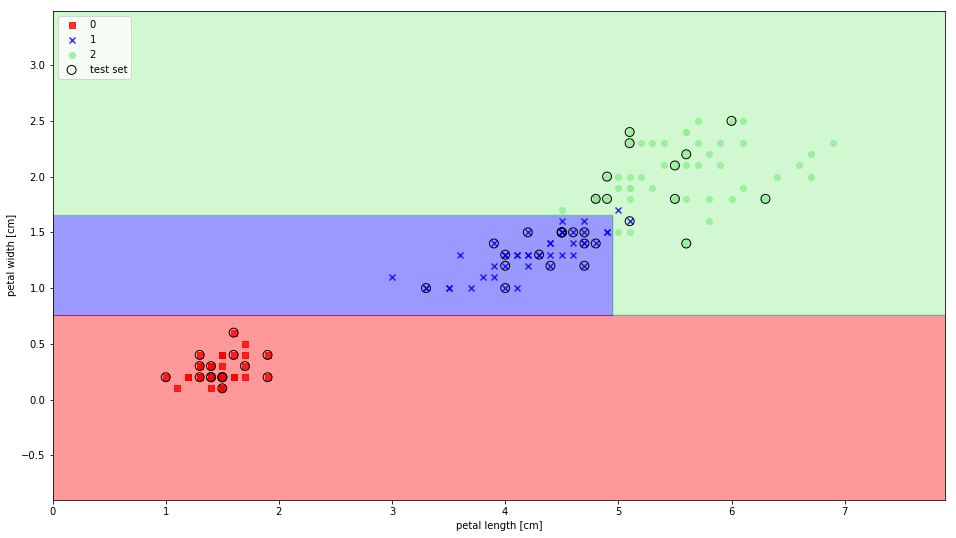

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth=3,
                             random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tree.dot',
               feature_names=['petal length', 'petal width'])

### Random Forest

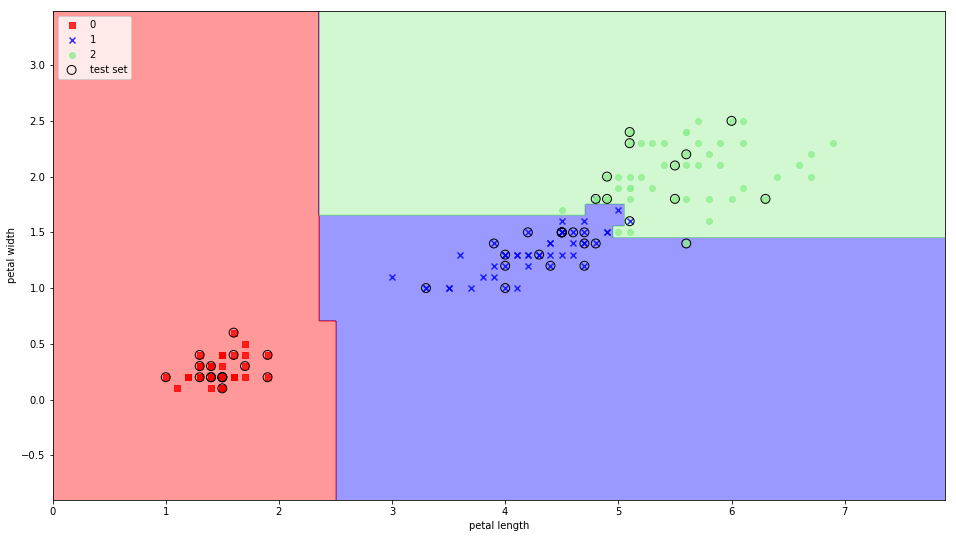

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=1)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### K-Nearest Neighbors (KNN)

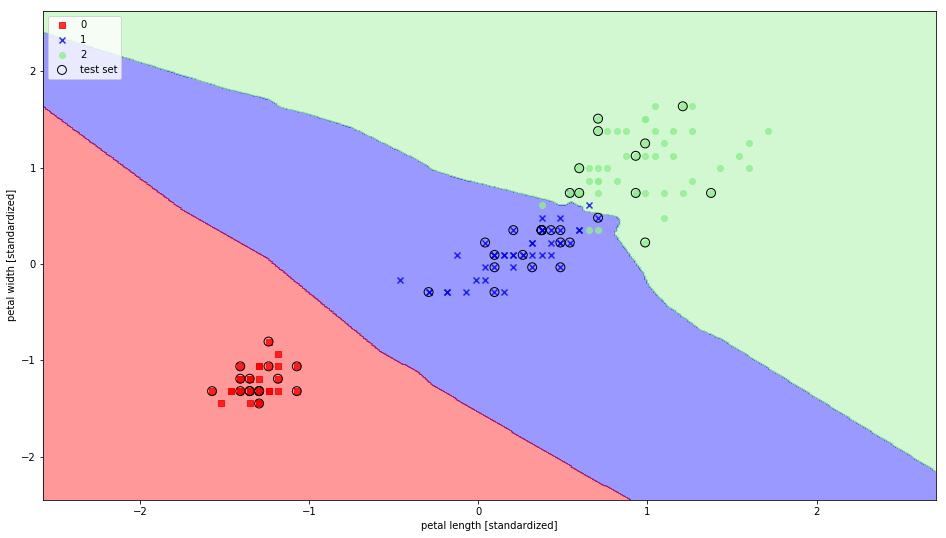

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()